## EDA - Review Text and Subcategory Scores
- Purpose is to see if there is a relationship between subcategory scores (accuracy, cleanliness) and if those topics are mentioned in the comments to better understand how to build out my classification model

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
url = 'https://drive.google.com/file/d/167mOe7k20D29QLjbYzFUi5Mqzrwf-lCe/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

df.head(3)

pd.options.display.max_colwidth = int(df['comments'].str.len().max()) + 1
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

KeyError: 'comments'

In [3]:
#data cleanup and checks in following cells 

df.isna().sum()

id                             0
date                           1
reviewer_id                    1
comments                       1
review_scores_rating           2
review_scores_accuracy         2
review_scores_cleanliness      2
review_scores_checkin          2
review_scores_communication    2
review_scores_location         3
review_scores_value            3
overall_score_bin              3
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602389 entries, 0 to 602391
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           602389 non-null  object 
 1   date                         602389 non-null  object 
 2   reviewer_id                  602389 non-null  float64
 3   comments                     602389 non-null  object 
 4   review_scores_rating         602389 non-null  float64
 5   review_scores_accuracy       602389 non-null  float64
 6   review_scores_cleanliness    602389 non-null  float64
 7   review_scores_checkin        602389 non-null  float64
 8   review_scores_communication  602389 non-null  float64
 9   review_scores_location       602389 non-null  float64
 10  review_scores_value          602389 non-null  float64
 11  overall_score_bin            602389 non-null  float64
dtypes: float64(9), object(3)
memory usage: 59.7+ MB


In [6]:
df['id'] = df['id'].astype(float)
df['date'] = pd.to_datetime(df['date'])

In [7]:
#binning review scores for subcategories for easier analysis

b = [0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]
l = [0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

df['accuracy_score_bin'] = pd.cut(df['review_scores_accuracy'], bins = b, labels=l, right=False)
df['cleanliness_score_bin'] = pd.cut(df['review_scores_cleanliness'], bins = b, labels=l, right=False)
df['checkin_score_bin'] = pd.cut(df['review_scores_checkin'], bins = b, labels=l, right=False)
df['communication_score_bin'] = pd.cut(df['review_scores_communication'], bins = b, labels=l, right=False)
df['location_score_bin'] = pd.cut(df['review_scores_location'], bins = b, labels=l, right=False)
df['value_score_bin'] = pd.cut(df['review_scores_value'], bins = b, labels=l, right=False)

## Cleanliness

In [8]:
clean = df[['cleanliness_score_bin', 'comments']]
clean.head(3)

,cleanliness_score_bin,comments
0,4.5,i ve stayed with my friend at the midtown castle for six days and it was a lovely place to be a big spacious room with a pointy roof which really makes you feel like staying in a castle the location is perfect it is just a few steps from macy s time square and theatre district everything worked just perfect with the keys etc thank you so much jennifer we had a great time in new york attention it s on the 4th floor without a lift but definetely worth it
1,4.5,we ve been staying here for about 9 nights enjoying to be in the center of the city that never sleepsshort ways to everywhere in manhattan by subway or by walk midtown castle is a beauftiful and tastful place jennifer and tori relaxed and friendly hosts thats why we the three berliners recommand that place good to have wifi and a little kitchen too
2,4.5,we had a wonderful stay at jennifer s charming apartment they were very organized and helpful i would definitely recommend staying at the midtown castle


In [9]:
#found code for joining list of words through stackoverflow

clean_words = ['clean', 'dirty', 'disgusting', 'immaculate', 'gross', 'spotless']

clean['contains_clean_word'] = clean['comments'].str.contains('|'.join(clean_words), True, False)

clean.head(3)

/var/folders/j4/fj647cj14gd9kk21c0z8rmm00000gn/T/ipykernel_2710/3322646403.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['contains_clean_word'] = clean['comments'].str.contains('|'.join(clean_words), True, False)


,cleanliness_score_bin,comments,contains_clean_word
0,4.5,i ve stayed with my friend at the midtown castle for six days and it was a lovely place to be a big spacious room with a pointy roof which really makes you feel like staying in a castle the location is perfect it is just a few steps from macy s time square and theatre district everything worked just perfect with the keys etc thank you so much jennifer we had a great time in new york attention it s on the 4th floor without a lift but definetely worth it,False
1,4.5,we ve been staying here for about 9 nights enjoying to be in the center of the city that never sleepsshort ways to everywhere in manhattan by subway or by walk midtown castle is a beauftiful and tastful place jennifer and tori relaxed and friendly hosts thats why we the three berliners recommand that place good to have wifi and a little kitchen too,False
2,4.5,we had a wonderful stay at jennifer s charming apartment they were very organized and helpful i would definitely recommend staying at the midtown castle,False


In [10]:
clean['contains_clean_word'].value_counts(normalize=True)

False    0.603781
True     0.396219
Name: contains_clean_word, dtype: float64

<AxesSubplot:title={'center':'Reviewers Ranked Cleanliness But Did Not Mention in Review'}>

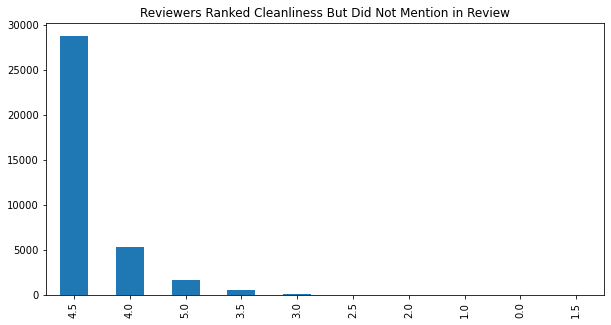

In [17]:
no_clean_words = clean[clean['contains_clean_word'] == False].sample(frac=.1)
no_clean_words['cleanliness_score_bin'].value_counts().plot.bar(figsize=(10,5), title='Reviewers Ranked Cleanliness But Did Not Mention in Review')

<AxesSubplot:title={'center':'Reviewers Rated Cleanliness as High And Mentioned in Reviews'}>

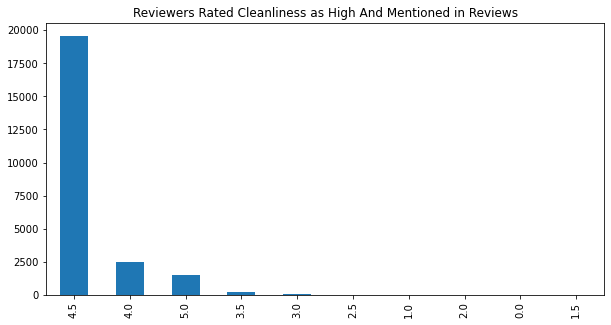

In [18]:
with_clean_words = clean[clean['contains_clean_word'] == True].sample(frac=.1)
with_clean_words['cleanliness_score_bin'].value_counts().plot.bar(figsize=(10,5), title='Reviewers Rated Cleanliness as High And Mentioned in Reviews')

- Not all reviews mention cleanliness, but the host still gets a score for cleanliness
- For reviews that do mention cleanliness, it looks like there's a linear relationship between cleanliness score and the mention of being clean
- Is there a relationship between positive and negative descriptions of cleanliness and cleanliness rating?

In [23]:
positive_clean_words = ['clean', 'immaculate', 'spotless', 'not dirty']
negative_clean_words = ['dirty', 'disgusting', 'gross', 'not clean']

clean['positive_clean'] = clean['comments'].str.contains('|'.join(positive_clean_words), True, False)
clean['negative_clean'] = clean['comments'].str.contains('|'.join(negative_clean_words), True, False)

clean.head(3)

/var/folders/j4/fj647cj14gd9kk21c0z8rmm00000gn/T/ipykernel_2710/2505064764.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['positive_clean'] = clean['comments'].str.contains('|'.join(positive_clean_words), True, False)
/var/folders/j4/fj647cj14gd9kk21c0z8rmm00000gn/T/ipykernel_2710/2505064764.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['negative_clean'] = clean['comments'].str.contains('|'.join(negative_clean_words), True, False)


,cleanliness_score_bin,comments,contains_clean_word,positive_clean,negative_clean
0,4.5,i ve stayed with my friend at the midtown castle for six days and it was a lovely place to be a big spacious room with a pointy roof which really makes you feel like staying in a castle the location is perfect it is just a few steps from macy s time square and theatre district everything worked just perfect with the keys etc thank you so much jennifer we had a great time in new york attention it s on the 4th floor without a lift but definetely worth it,False,False,False
1,4.5,we ve been staying here for about 9 nights enjoying to be in the center of the city that never sleepsshort ways to everywhere in manhattan by subway or by walk midtown castle is a beauftiful and tastful place jennifer and tori relaxed and friendly hosts thats why we the three berliners recommand that place good to have wifi and a little kitchen too,False,False,False
2,4.5,we had a wonderful stay at jennifer s charming apartment they were very organized and helpful i would definitely recommend staying at the midtown castle,False,False,False


<AxesSubplot:title={'center':'Reviewers Rated Cleanliness as High With Positive Words About Cleanliness'}>

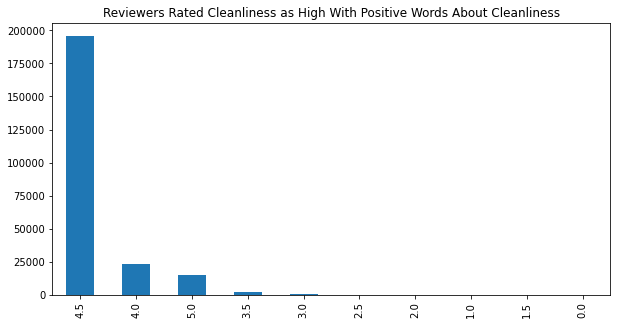

In [24]:
#check rates for positive clean

positive_clean  = clean[clean['positive_clean'] == True]
positive_clean['cleanliness_score_bin'].value_counts().plot.bar(figsize=(10,5), title='Reviewers Rated Cleanliness as High With Positive Words About Cleanliness')

<AxesSubplot:title={'center':'Reviewers Still Rated Cleanliness as High Even With Negative Words About Cleanliness'}>

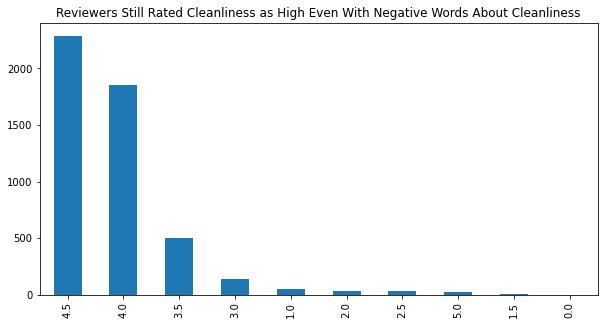

In [25]:
#check rates for negative clean

neg_clean  = clean[clean['negative_clean'] == True]
neg_clean['cleanliness_score_bin'].value_counts().plot.bar(figsize=(10,5), title='Reviewers Still Rated Cleanliness as High Even With Negative Words About Cleanliness')

- This reveals that subcategory ratings-- at an aggregate level --might have outlier incidents of being dirty or unclean, but the overall rating will still remain high if the apartment is generally clean for other stays
- Reviews can be used to extract categories that visitors found important to mention in their reviews. Additional EDA can be done to find what key words highlight subcategory themes visitors wrote about in their reviews and pulled into target columns, which can be used to train the classification model.